# Predicting Housing Sale Prices in Ames, Iowa

----




### Project Description
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, our goal is to predict the final price of each home of the test data set using the training data set.


### Research Question to Answer
What housing characteristics affect the price of a home most significantly?

H0: The following housing characteristics have no effect on housing prices in Ames, Iowa.

* Year remodeled
* Lot area
* Living area sq ft
* Total basement sq ft
* Overall quality 

Ha: The above housing characteristics have an effect on housing prices in Ames, Iowa.

### Datasets

79 Columns x 1461 Rows of housing sales data from years 2006 to 2010

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


----

In [2]:
# Dependencies and Setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import glm
import statsmodels.api as sm
import seaborn as sns

In [3]:
# Importing Data
data = pd.read_csv("train.csv")

# Inserting natural log of SalePrice
data["ln_SalePrice"] = np.log(data["SalePrice"])

#### Observation of Sales Prices Distributions

* Sales Price vs. Frequency 
* Ln of Sales Price vs. Frequency

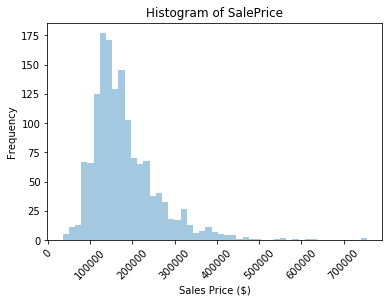

In [4]:
# Plot Histogram of Sales Price vs. Frequency
target = "SalePrice"
sns.distplot(data[target], kde= False)

# Histogram labeling/formatting
plt.xticks(rotation = 45)
plt.title("Histogram of " + target)
plt.xlabel("Sales Price ($)")
plt.ylabel("Frequency")
plt.show()

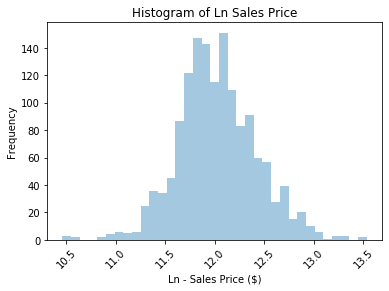

In [5]:
# Historgram of Natural Log of SalePrice
target = "ln_SalePrice"
sns.distplot(data[target], kde= False)

# Histogram labeling/formatting
plt.xticks(rotation = 45)
plt.title("Histogram of Ln Sales Price")
plt.xlabel("Ln - Sales Price ($)")
plt.ylabel("Frequency")
plt.show()

### Observations of the 5 housing features (from research question)

#### 5 Housing features and their description
1. Overall Quality: overall quality of materials/finish of the house (1-10 Rating Scale)

2. YearRemodAdd: the year the house was remodeled if no remodelling was performed then it is the same as year the house was built (YYYY)

3. TotalBsmtSF: total area of basement area (sqft)

4. GrLivArea: total area of livable (above ground) area (sqft)

5. LotArea: Lot size (sqft)


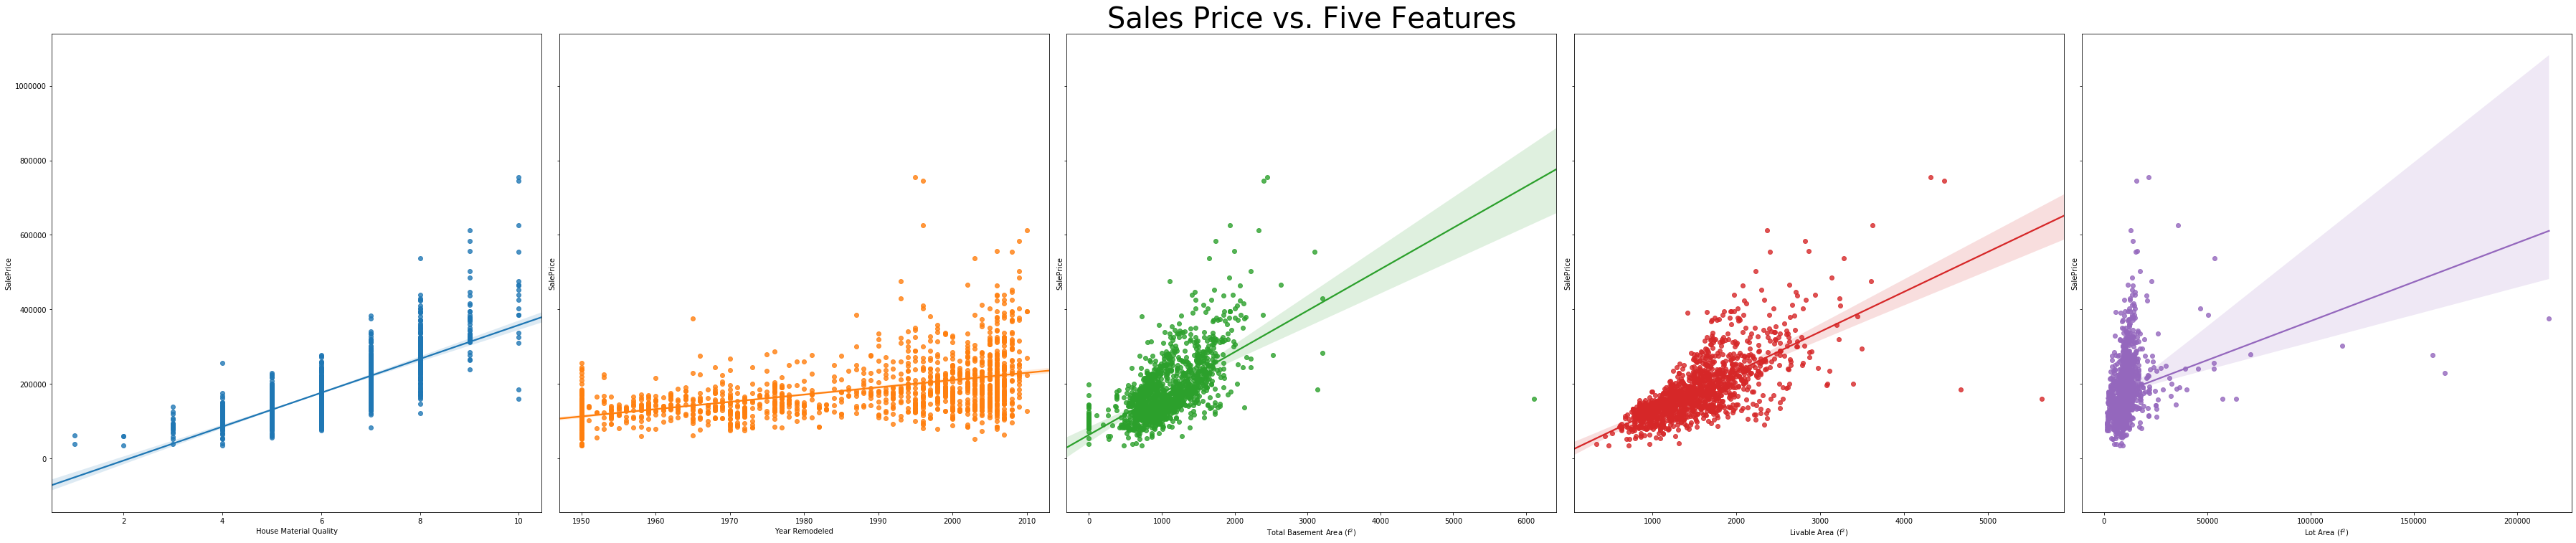

In [40]:
# Oneway plots of field vs. Sales Price
target = "SalePrice"

# Isolating housing features relevant to Hypothesis
field1 = data.columns[17] # OverallQual: overall quality of materials/finish of house (1-10 rating)
field2 = data.columns[20] # YearRemodAdd: year remodeled
field3 = data.columns[38] # TotalBsmtSF: total basement area (sqft)
field4 = data.columns[46] # GrLivArea: livable area (sqft)
field5 = data.columns[4] # LotArea: lot area (sqft)

oneway1 = data[[field1,target]]
oneway2 = data[[field2,target]]
oneway3 = data[[field3,target]]
oneway4 = data[[field4,target]]
oneway5 = data[[field5,target]]

oneway = [field1,field2,field3,field4,field5]
#fig = plt.figure()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, nrows=1, figsize=(50,10),sharey = True)

#plt.scatter(oneway[field1],oneway[target])
sns.regplot(oneway1[field1], oneway1[target], ax = ax1)
sns.regplot(oneway2[field2], oneway2[target], ax = ax2)
sns.regplot(oneway3[field3], oneway3[target], ax = ax3)
sns.regplot(oneway4[field4], oneway4[target], ax = ax4)
sns.regplot(oneway5[field5], oneway5[target], ax = ax5, truncate = True)
plt.tight_layout()

# Plot axis labels and title
ax1.set_xlabel("House Material Quality")
ax2.set_xlabel("Year Remodeled")
ax3.set_xlabel("Total Basement Area (f$^2$)")
ax4.set_xlabel("Livable Area (f$^2$)")
ax5.set_xlabel("Lot Area (f$^2$)")
ax3.set_title("Sales Price vs. Five Features",fontsize = 40)

# Scatterplot labeling/formatting
# plt.title(f"{field1} vs. Sales Price")
#plt.xlabel(oneway)
#plt.ylabel(oneway.columns[1])
#plt.show()


# # call regplot on each axes
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
# sns.regplot(x=idx, y=df['x'], ax=ax1)
# sns.regplot(x=idx, y=df['y'], ax=ax2)
#plt.show()
plt.savefig("5plot.png")

#### Observations of all 79 house features

Why not observe all 79 house features' effects on sales prices? 

In [37]:
# Dealing with categorical data

# Import data to convert text fields to categorical fields
data1 = pd.read_csv("train.csv")
data1["ln_SalePrice"] = np.log(data1["SalePrice"])
obj_list = data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
le = LabelEncoder()

# transforming labels and converting categorical data into dummy/indicator variables 
for i in obj_list.index:
    try:
        le.fit(data1[i])
        data1[i] = le.transform(data1[i])
    except:
        data1[i] = pd.get_dummies(data1[i])

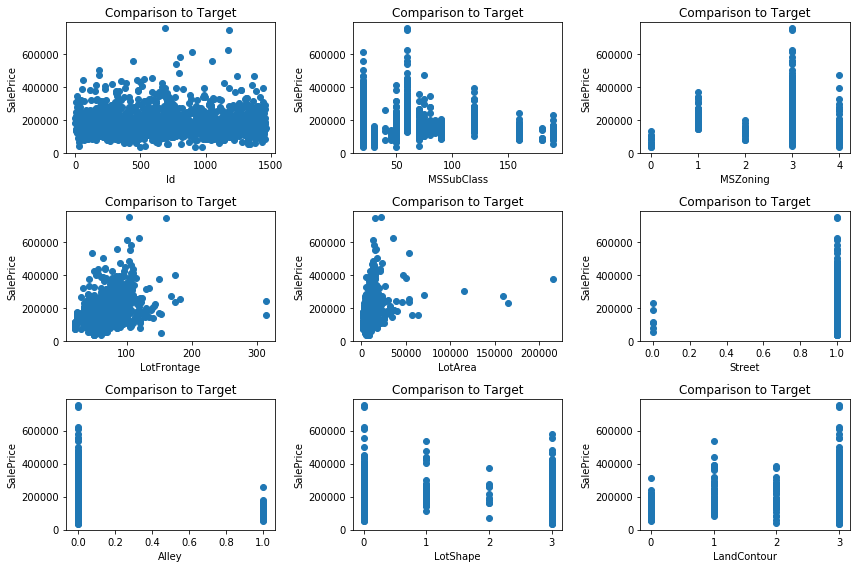

In [38]:
# Plot oneway graphs field versus target
j = 0 #select the starting field for the 9 plots
fig = plt.figure(figsize=(12,8))

for i in range(9):
    field1 = data1.columns[j]
    oneway = data1[[field1,target]]
    plt.subplot(3,3,i+1)
    try:
        plt.scatter(oneway[field1],oneway[target])
    except:
        plt.scatter(0,0)
    plt.title("Comparison to Target")
    plt.xlabel(oneway.columns[0])
    plt.ylabel(oneway.columns[1])
    j=j+1

plt.tight_layout()
#plt.savefig("Images/Group9.png")
plt.show()

#### Analyses

##### Generalized Linear Model 
The GLM is utilized to 

In [24]:
# Generalized Linear Model consistent with Ordinary least squares

#Initializing variables
dev_comp = pd.DataFrame()
fields = []
dev1 = []
dev2 = []

# Calculating Deviance
for i in range(80):
    
    # Deviance of Ln Sales Price
    form1 = "ln_SalePrice ~ " + data.columns[i]
    fields.append(data.columns[i])
    
    try:
        model_ols = glm(formula = form1, data = data,family = sm.families.Gaussian()).fit()
        dev1.append(model_ols.null_deviance - model_ols.deviance)
    except:
        dev1.append(0)
    
    # Deviance of Sales Price
    form1 = "SalePrice ~ " + data.columns[i]
    try:
        model_ols = glm(formula = form1, data = data,family = sm.families.Gaussian()).fit()
        dev2.append(model_ols.null_deviance - model_ols.deviance)
    except:
        dev2.append(0)
        
    dev_comp.append([data.columns[i], dev1])

# Output deviance measures and rank by decending
dev_comp["Fields"] = fields
dev_comp["Dev1"] = dev1
dev_comp["Dev2"] = dev2
dev_comp = dev_comp.sort_values(by="Dev1", ascending=False)
print(dev_comp)

           Fields        Dev1          Dev2
17    OverallQual  155.462039  5.760947e+12
12   Neighborhood  132.884425  5.023606e+12
46      GrLivArea  114.374538  4.623740e+12
61     GarageCars  107.844935  3.776385e+12
27      ExterQual  107.349496  4.395744e+12
53    KitchenQual  104.210816  4.204320e+12
62     GarageArea   98.627072  3.578809e+12
30       BsmtQual   96.017988  4.066554e+12
38    TotalBsmtSF   87.232270  3.466605e+12
49       FullBath   82.353698  2.894450e+12
19      YearBuilt   80.098477  2.517642e+12
20   YearRemodAdd   74.475776  2.367827e+12
29     Foundation   70.690176  2.360618e+12
54   TotRmsAbvGrd   66.489519  2.622969e+12
60   GarageFinish   64.417274  2.299993e+12
59    GarageYrBlt   58.304718  2.035564e+12
56     Fireplaces   55.769899  2.007532e+12
40      HeatingQC   54.362995  1.800151e+12
58     GarageType   53.616641  1.778186e+12
25     MasVnrType   44.551599  1.713827e+12
33   BsmtFinType1   43.720883  1.726056e+12
26     MasVnrArea   42.951032  2

In [54]:
# Show the average Sales Price by selected fields (i)
i= 17
d1 = data1.groupby(data1.columns[i])
d1["SalePrice"].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

In [55]:
# Create formula (form1) for use in linear models
a = data1.columns[4]
b = data1.columns[17]
c = data1.columns[20]
d = data1.columns[38]
e = data1.columns[46]

form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form1

'SalePrice ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea'

In [56]:
# GLM consistent with Ordinary least squares
model_ols = glm(formula = form1, data = data1,family = sm.families.Gaussian()).fit()
print(model_ols.null_deviance - model_ols.deviance)
print(model_ols.summary())

6991790484001.785
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      1.5242e+09
Method:                          IRLS   Log-Likelihood:                -17504.
Date:                Thu, 25 Jul 2019   Deviance:                   2.2161e+12
Time:                        18:15:52   Pearson chi2:                 2.22e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.054e+06   1.15e+05     -9.148      0.000   -1.28e+06   -8.28e+05
LotArea          0.6950     

In [57]:
# GLM with Poisson family
model_glm = glm(formula = form1, data = data1, family = sm.families.Poisson()).fit()
print(model_glm.null_deviance - model_glm.deviance)
print(model_glm.null_deviance - model_ols.deviance)
print(model_glm.summary())

35587111.898215
-2216076228999.584
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.5274e+06
Date:                Thu, 25 Jul 2019   Deviance:                   9.0345e+06
Time:                        18:15:52   Pearson chi2:                 8.27e+06
No. Iterations:                     6   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6252      0.008    478.903      0.000       3.610       3.640
LotArea    

In [58]:
# GLM consistent with Ordinary least squares
model_glm = glm(formula = form1, data = data1, family = sm.families.Gamma(link = sm.families.links.log)).fit()
print(model_glm.null_deviance - model_glm.deviance)
print(model_glm.summary())

197.31349341634447
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                        0.023940
Method:                          IRLS   Log-Likelihood:                -17041.
Date:                Thu, 25 Jul 2019   Deviance:                       41.443
Time:                        18:15:53   Pearson chi2:                     34.8
No. Iterations:                    17   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7055      0.456      8.117      0.000       2.811       4.600
LotArea       3.942e-06   4

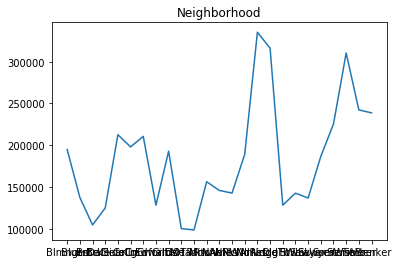

In [59]:
# Show the average target by selected fields (i)
i= 12
d1 = data.groupby(data.columns[i])
plt.plot(d1["SalePrice"].mean())
plt.title(data.columns[i])
plt.show()

In [60]:
# Create formula (form1) for use in linear models
a = data.columns[4]
b = data.columns[17]
c = data.columns[20]
d = data.columns[38]
e = data.columns[46]
f = data.columns[18]
g = data.columns[19]

form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e + " + " + f 
form2 = "ln_SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e + " + " + f 
form2

'ln_SalePrice ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea + OverallCond'

In [61]:
# GLM consistent with Ordinary least squares
model_ols = glm(formula = form1, data = data, family = sm.families.Gaussian()).fit()
print(model_ols.summary())
model_ols_ln = glm(formula = form2, data = data, family = sm.families.Gaussian()).fit()
print(model_ols_ln.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1453
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                      1.5247e+09
Method:                          IRLS   Log-Likelihood:                -17504.
Date:                Thu, 25 Jul 2019   Deviance:                   2.2154e+12
Time:                        18:15:57   Pearson chi2:                 2.22e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.045e+06   1.16e+05     -9.026      0.000   -1.27e+06   -8.18e+05
LotArea          0.6913      0.109      6.349 

Diff1 min: -526,861.28
Diff1 max: 286,847.45
Diff2 min: -1,770,585.49
Diff2 max: 222,326.20


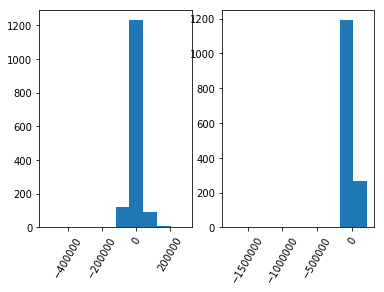

In [62]:
data["Pred1"] = model_ols.predict()
data["Diff1"] = data["SalePrice"] - data["Pred1"]
data["Pred2"] = np.exp(model_ols_ln.predict())
data["Diff2"] = data["SalePrice"] - data["Pred2"]
print("Diff1 min: " + "{:,.2f}".format(data["Diff1"].min()))
print("Diff1 max: " + "{:,.2f}".format(data["Diff1"].max()))
print("Diff2 min: " + "{:,.2f}".format(data["Diff2"].min()))
print("Diff2 max: " + "{:,.2f}".format(data["Diff2"].max()))

plt.subplot(1,2,1)
plt.hist(data["Diff1"])
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
plt.hist(data["Diff2"])
plt.xticks(rotation = 60)
plt.show()

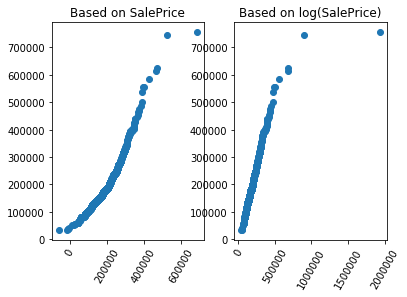

In [63]:
plt.subplot(1,2,1)
plt.scatter(np.sort(data["Pred1"]),np.sort(data["SalePrice"]))
plt.title("Based on SalePrice")
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
plt.scatter(np.sort(data["Pred2"]),np.sort(data["SalePrice"]))
plt.title("Based on log(SalePrice)")
plt.xticks(rotation = 60)
plt.show()

In [64]:
data_model = data[["LotArea", "OverallQual", "YearRemodAdd", "TotalBsmtSF", "GrLivArea", "Neighborhood", "BldgType",
                   "SalePrice", "Pred1", "Diff1", "Pred2","Diff2"]]
outliers = data_model[data_model["Diff2"] < -500000]
outliers

,LotArea,OverallQual,YearRemodAdd,TotalBsmtSF,GrLivArea,Neighborhood,BldgType,SalePrice,Pred1,Diff1,Pred2,Diff2
523,40094,10,2008,3138,4676,Edwards,1Fam,184750,526553.730897,-341803.730897,9.047496e+05,-7.199996e+05
1298,63887,10,2008,6110,5642,Edwards,1Fam,160000,686861.276386,-526861.276386,1.930585e+06,-1.770585e+06


In [65]:
test = data_model[(data_model["Neighborhood"] == 7) & (data_model["OverallQual"] > 7)]
test

,LotArea,OverallQual,YearRemodAdd,TotalBsmtSF,GrLivArea,Neighborhood,BldgType,SalePrice,Pred1,Diff1,Pred2,Diff2


In [66]:
stats.ttest_ind(data["SalePrice"],data["Pred1"], equal_var=False)
stats.ttest_ind(data["SalePrice"],data["Pred2"], equal_var=False)

NameError: name 'stats' is not defined